In [11]:
import pandas as pd
import os
import numpy as np
import json
import glob
import hashlib
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from itertools import combinations

In [2]:
df_rag_st= pd.read_csv('/home/cptaswadu/new-rescue/RESCUE-n8n/eval/insurance/results/LLM_QnA/RAG/final/final_rag_combined_results_with_both_adjusted_accuracy.csv')
df_baseline_st = pd.read_csv('/home/cptaswadu/new-rescue/RESCUE-n8n/eval/insurance/results/LLM_QnA/RAG/final/final_baseline_combined_results_with_both_adjusted_accuracy.csv')
df_baseline_te = pd.read_csv('/home/cptaswadu/new-rescue/RESCUE-n8n/eval/insurance/results/LLM_QnA/RAG/final/baseline_openai_header_combined_results_with_both_adjusted_accuracy.csv')
df_rag_te = pd.read_csv('/home/cptaswadu/new-rescue/RESCUE-n8n/eval/insurance/results/LLM_QnA/RAG/final/openai_header_data_with_both_adjusted_accuracy.csv')

df_baseline_filtered = df_baseline_st[(df_baseline_st['qna_model'] == 'gpt_5_mini') & (df_baseline_st['retrieval_model'] == 'gpt_5_mini')]
df_rag_filtered = df_rag_st[(df_rag_st['qna_model'] == 'gpt_5_mini') & (df_rag_st['retrieval_model'] == 'gpt_5_mini')]
df_baseline_te_filtered = df_baseline_te[(df_baseline_te['qna_model'] == 'gpt_5_mini') & (df_baseline_te['retrieval_model'] == 'gpt_5_mini')]

df_rag_f5 = pd.concat([df_rag_filtered, df_rag_te], ignore_index=True)
df_baseline_f5 = pd.concat([df_baseline_filtered, df_baseline_te_filtered], ignore_index=True)
df_f5 = pd.concat([df_baseline_f5, df_rag_f5], ignore_index=True)
df_f5.columns.tolist()

['case_id',
 'Q0',
 'Q1',
 'Q2',
 'Q3',
 'Q4',
 'Q5',
 'Q6',
 'Q7',
 'Q8',
 'token_input',
 'token_output',
 'token_total',
 'top_k',
 'retrieval_count',
 'combo_folder',
 'retrieval_model',
 'qna_model',
 'match',
 'representation',
 'correct',
 'adjusted_total',
 'adjusted_accuracy',
 'wrong_questions',
 'ground_truth',
 'error']

In [3]:
columns_to_keep = ['case_id', 'Q0', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'top_k', 
                   'retrieval_count', 'match', 'representation', 'correct', 'adjusted_total', 
                   'adjusted_accuracy', 'wrong_questions', 'ground_truth', 'combo_folder']

df_f5_filtered = df_f5[df_f5['error'].isna()][columns_to_keep]
df_f5_filtered.head()

,case_id,Q0,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,top_k,retrieval_count,match,representation,correct,adjusted_total,adjusted_accuracy,wrong_questions,ground_truth,combo_folder
0,Case10075,CMA,Not Specified,Not Specified,Not Specified,Not Specified,Yes,Yes,81228,Yes,1,10,1,Baseline_SentenceTransformer,2,2,100.000000,NaN,NaN,top1_10retrieve_gpt_5_mini_gpt_5_mini
1,Case11795,WES,Yes,Not Specified,Yes,Yes,Yes,Yes,81415,Yes,1,10,1,Baseline_SentenceTransformer,7,7,100.000000,NaN,NaN,top1_10retrieve_gpt_5_mini_gpt_5_mini
2,Case12792,BRCA1/2,Not Specified,Not Specified,No,Not Specified,No,Yes,Not Specified,No,1,10,1,Baseline_SentenceTransformer,5,5,100.000000,NaN,NaN,top1_10retrieve_gpt_5_mini_gpt_5_mini
3,Case13983,WGS,Yes,Not Specified,Yes,Not Specified,Yes,Yes,81425,Yes,1,10,1,Baseline_SentenceTransformer,6,6,100.000000,NaN,NaN,top1_10retrieve_gpt_5_mini_gpt_5_mini
4,Case14017,WES,Not Specified,Not Specified,Yes,No,Yes,Yes,81415,No,1,10,1,Baseline_SentenceTransformer,4,6,66.666667,"Q4,Q5",Q4:Yes|Q5:No,top1_10retrieve_gpt_5_mini_gpt_5_mini


In [4]:
pd.DataFrame({
    'count': df_f5_filtered['representation'].value_counts(),
    'percentage': df_f5_filtered['representation'].value_counts(normalize=True) * 100
})

,count,percentage
representation,,
Baseline_SentenceTransformer,420,25.014890
Baseline_OpenAI,420,25.014890
RAG_OpenAI,420,25.014890
RAG_SentenceTransformer,419,24.955331


In [5]:
df_st = pd.concat([df_baseline_st, df_rag_st], ignore_index=True)
df_te = pd.concat([df_baseline_te, df_rag_te], ignore_index=True)
df_f7 = pd.concat([df_st, df_te], ignore_index=True)
df_f7_filtered = df_f7[df_f7['error'].isna()][columns_to_keep]
df_f7_filtered.head()

,case_id,Q0,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,top_k,retrieval_count,match,representation,correct,adjusted_total,adjusted_accuracy,wrong_questions,ground_truth,combo_folder
0,Case10075,CMA,Not Specified,Not Specified,Not Specified,Not Specified,Yes,Yes,81228,Yes,1,10,1,Baseline_SentenceTransformer,2,2,100.000000,NaN,NaN,top1_10retrieve_gpt_5_mini_gpt_5_mini
1,Case11795,WES,Yes,Not Specified,Yes,Yes,Yes,Yes,81415,Yes,1,10,1,Baseline_SentenceTransformer,7,7,100.000000,NaN,NaN,top1_10retrieve_gpt_5_mini_gpt_5_mini
2,Case12792,BRCA1/2,Not Specified,Not Specified,No,Not Specified,No,Yes,Not Specified,No,1,10,1,Baseline_SentenceTransformer,5,5,100.000000,NaN,NaN,top1_10retrieve_gpt_5_mini_gpt_5_mini
3,Case13983,WGS,Yes,Not Specified,Yes,Not Specified,Yes,Yes,81425,Yes,1,10,1,Baseline_SentenceTransformer,6,6,100.000000,NaN,NaN,top1_10retrieve_gpt_5_mini_gpt_5_mini
4,Case14017,WES,Not Specified,Not Specified,Yes,No,Yes,Yes,81415,No,1,10,1,Baseline_SentenceTransformer,4,6,66.666667,"Q4,Q5",Q4:Yes|Q5:No,top1_10retrieve_gpt_5_mini_gpt_5_mini


In [6]:
pd.DataFrame({
    'count': df_f7_filtered['representation'].value_counts(),
    'percentage': df_f7_filtered['representation'].value_counts(normalize=True) * 100
})

,count,percentage
representation,,
Baseline_SentenceTransformer,1680,40.009526
RAG_SentenceTransformer,1679,39.985711
Baseline_OpenAI,420,10.002382
RAG_OpenAI,420,10.002382


In [7]:
df_f5_filtered.to_csv('/home/cptaswadu/new-rescue/RESCUE-n8n/eval/insurance/results/LLM_QnA/RAG/final/analysis/combined_f5_filtered_results.csv', index=False)
df_f7_filtered.to_csv('/home/cptaswadu/new-rescue/RESCUE-n8n/eval/insurance/results/LLM_QnA/RAG/final/analysis/combined_f7_filtered_results.csv', index=False)

In [9]:
result = df_f5_filtered.groupby(['match', 'representation']).agg({
    'case_id': 'count',
    'adjusted_accuracy': ['mean', 'median'],
    'correct': 'mean',
    'adjusted_total': 'mean'
}).round(2)
print(result)

                                   case_id adjusted_accuracy         correct  \
                                     count              mean  median    mean   
match representation                                                           
0     Baseline_OpenAI                   85             75.43   80.00    3.92   
      Baseline_SentenceTransformer     270             76.15   75.00    4.63   
      RAG_OpenAI                        85             71.53   66.67    3.49   
      RAG_SentenceTransformer          269             73.30   71.43    4.27   
1     Baseline_OpenAI                  335             80.65   83.33    4.87   
      Baseline_SentenceTransformer     150             85.79  100.00    4.77   
      RAG_OpenAI                       335             86.91   87.50    5.50   
      RAG_SentenceTransformer          150             87.09  100.00    4.88   

                                   adjusted_total  
                                             mean  
match represent

Plot saved!


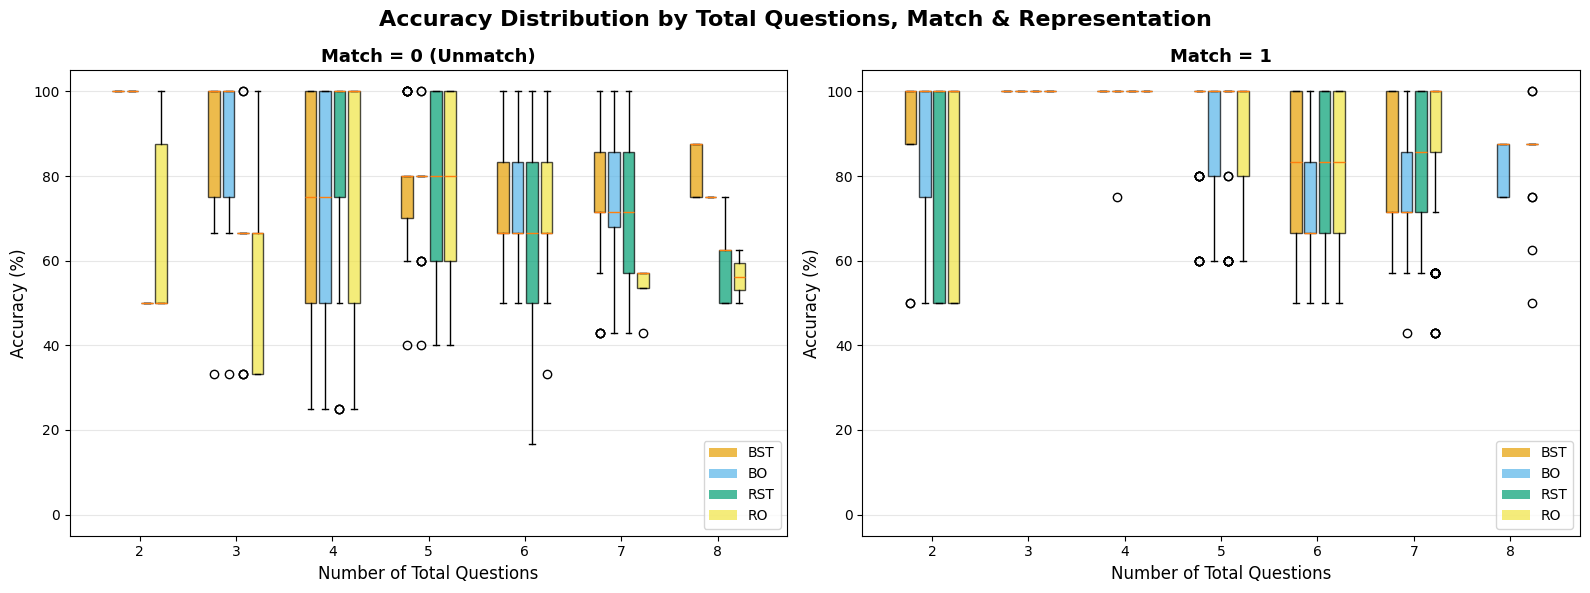

In [ ]:
colors = ['#E69F00', '#56B4E9', '#009E73', '#F0E442']
representations = ['Baseline_SentenceTransformer', 'Baseline_OpenAI', 
                   'RAG_SentenceTransformer', 'RAG_OpenAI']
rep_labels = ['BST', 'BO', 'RST', 'RO']

# Figure 생성
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Accuracy Distribution by Total Questions, Match & Representation', 
             fontsize=16, fontweight='bold')

# Total question 값들
total_q_values = sorted(df_f5_filtered['adjusted_total'].unique())

# Match별로 처리
for idx, match_val in enumerate([0, 1]):
    ax = axes[idx]
    df_match = df_f5_filtered[df_f5_filtered['match'] == match_val]
    
    # 각 total question 값에 대해
    positions_all = []
    data_all = []
    colors_all = []
    
    for i, total_q in enumerate(total_q_values):
        # 각 representation에 대해
        for j, rep in enumerate(representations):
            df_subset = df_match[(df_match['adjusted_total'] == total_q) & 
                                  (df_match['representation'] == rep)]
            
            if len(df_subset) > 0:
                data_all.append(df_subset['adjusted_accuracy'].values)
                # Position: total_q 기준 + representation offset
                positions_all.append(total_q + (j - 1.5) * 0.15)
                colors_all.append(colors[j])
    
    # Box plot 그리기
    bp = ax.boxplot(data_all, positions=positions_all, 
                     patch_artist=True, widths=0.12,
                     showfliers=True)
    
    # 색상 적용
    for patch, color in zip(bp['boxes'], colors_all):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)
    
    # 축 설정
    ax.set_xlabel('Number of Total Questions', fontsize=12)
    ax.set_ylabel('Accuracy (%)', fontsize=12)
    title = 'Match = 0 (Unmatch)' if match_val == 0 else 'Match = 1'
    ax.set_title(title, fontsize=13, fontweight='bold')
    ax.set_xticks(total_q_values)
    ax.set_xticklabels(total_q_values)
    ax.set_ylim(-5, 105)
    ax.grid(axis='y', alpha=0.3)
    
    # 범례
    legend_elements = [Patch(facecolor=colors[i], alpha=0.7, label=rep_labels[i]) 
                      for i in range(4)]
    ax.legend(handles=legend_elements, loc='lower right', fontsize=10)

plt.tight_layout()
#plt.savefig('/mnt/user-data/outputs/accuracy_by_total_questions.png', 
            #dpi=300, bbox_inches='tight')
#print("Plot saved!")
plt.show()

In [10]:
df_f5_filtered.head()

,case_id,Q0,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,...,retrieval_count,match,representation,correct,adjusted_total,adjusted_accuracy,wrong_questions,ground_truth,combo_folder,combo
0,Case10075,CMA,Not Specified,Not Specified,Not Specified,Not Specified,Yes,Yes,81228,Yes,...,10,1,Baseline_SentenceTransformer,2,2,100.000000,NaN,NaN,top1_10retrieve_gpt_5_mini_gpt_5_mini,1_Baseline_SentenceTransformer
1,Case11795,WES,Yes,Not Specified,Yes,Yes,Yes,Yes,81415,Yes,...,10,1,Baseline_SentenceTransformer,7,7,100.000000,NaN,NaN,top1_10retrieve_gpt_5_mini_gpt_5_mini,1_Baseline_SentenceTransformer
2,Case12792,BRCA1/2,Not Specified,Not Specified,No,Not Specified,No,Yes,Not Specified,No,...,10,1,Baseline_SentenceTransformer,5,5,100.000000,NaN,NaN,top1_10retrieve_gpt_5_mini_gpt_5_mini,1_Baseline_SentenceTransformer
3,Case13983,WGS,Yes,Not Specified,Yes,Not Specified,Yes,Yes,81425,Yes,...,10,1,Baseline_SentenceTransformer,6,6,100.000000,NaN,NaN,top1_10retrieve_gpt_5_mini_gpt_5_mini,1_Baseline_SentenceTransformer
4,Case14017,WES,Not Specified,Not Specified,Yes,No,Yes,Yes,81415,No,...,10,1,Baseline_SentenceTransformer,4,6,66.666667,"Q4,Q5",Q4:Yes|Q5:No,top1_10retrieve_gpt_5_mini_gpt_5_mini,1_Baseline_SentenceTransformer


In [11]:
grouped = df_f5_filtered.groupby(['top_k', 'retrieval_count', 'representation', 'match'])['case_id'].apply(list).reset_index()
grouped.columns = ['top_k', 'retrieval_count', 'representation', 'match', 'case_ids']
print(grouped)

    top_k  retrieval_count                representation  match  \
0       1               10               Baseline_OpenAI      0   
1       1               10               Baseline_OpenAI      1   
2       1               10  Baseline_SentenceTransformer      0   
3       1               10  Baseline_SentenceTransformer      1   
4       1               10                    RAG_OpenAI      0   
5       1               10                    RAG_OpenAI      1   
6       1               10       RAG_SentenceTransformer      0   
7       1               10       RAG_SentenceTransformer      1   
8       1               30               Baseline_OpenAI      0   
9       1               30               Baseline_OpenAI      1   
10      1               30  Baseline_SentenceTransformer      0   
11      1               30  Baseline_SentenceTransformer      1   
12      1               30                    RAG_OpenAI      0   
13      1               30                    RAG_OpenAI      

In [12]:
grouped['num_cases'] = grouped['case_ids'].apply(len)
print(grouped[['top_k', 'retrieval_count', 'representation', 'match', 'num_cases']])

    top_k  retrieval_count                representation  match  num_cases
0       1               10               Baseline_OpenAI      0         23
1       1               10               Baseline_OpenAI      1         82
2       1               10  Baseline_SentenceTransformer      0         70
3       1               10  Baseline_SentenceTransformer      1         35
4       1               10                    RAG_OpenAI      0         23
5       1               10                    RAG_OpenAI      1         82
6       1               10       RAG_SentenceTransformer      0         70
7       1               10       RAG_SentenceTransformer      1         35
8       1               30               Baseline_OpenAI      0         20
9       1               30               Baseline_OpenAI      1         85
10      1               30  Baseline_SentenceTransformer      0         66
11      1               30  Baseline_SentenceTransformer      1         39
12      1               3

In [13]:
baseline = grouped[grouped['representation'].str.contains('Baseline')].copy()
rag = grouped[grouped['representation'].str.contains('RAG')].copy()

baseline['model'] = baseline['representation'].str.replace('Baseline_', '')
rag['model'] = rag['representation'].str.replace('RAG_', '')

baseline_compare = baseline.merge(
    baseline,
    on=['top_k', 'retrieval_count', 'match'],
    suffixes=('_ST', '_OpenAI')
)

baseline_compare = baseline_compare[
    baseline_compare['model_ST'] == 'SentenceTransformer'
]

baseline_compare = baseline_compare[baseline_compare['model_ST'] != baseline_compare['model_OpenAI']]

rag_compare = rag.merge(
    rag,
    on=['top_k', 'retrieval_count', 'match'],
    suffixes=('_ST', '_OpenAI')
)

rag_compare = rag_compare[
    rag_compare['model_ST'] == 'SentenceTransformer'
]

rag_compare = rag_compare[rag_compare['model_ST'] != rag_compare['model_OpenAI']]

for idx, row in baseline_compare.iterrows():
    st_cases = set(row['case_ids_ST'])
    openai_cases = set(row['case_ids_OpenAI'])
    
    print(f"\ntop_k={row['top_k']}, retrieval={row['retrieval_count']}, match={row['match']}")
    print(f"  ST only: {len(st_cases - openai_cases)} cases")
    print(f"  OpenAI only: {len(openai_cases - st_cases)} cases")
    print(f"  Both: {len(st_cases & openai_cases)} cases")


top_k=1, retrieval=10, match=0
  ST only: 49 cases
  OpenAI only: 2 cases
  Both: 21 cases

top_k=1, retrieval=10, match=1
  ST only: 2 cases
  OpenAI only: 49 cases
  Both: 33 cases

top_k=1, retrieval=30, match=0
  ST only: 50 cases
  OpenAI only: 4 cases
  Both: 16 cases

top_k=1, retrieval=30, match=1
  ST only: 4 cases
  OpenAI only: 50 cases
  Both: 35 cases

top_k=3, retrieval=10, match=0
  ST only: 47 cases
  OpenAI only: 1 cases
  Both: 22 cases

top_k=3, retrieval=10, match=1
  ST only: 1 cases
  OpenAI only: 47 cases
  Both: 35 cases

top_k=3, retrieval=30, match=0
  ST only: 49 cases
  OpenAI only: 3 cases
  Both: 16 cases

top_k=3, retrieval=30, match=1
  ST only: 3 cases
  OpenAI only: 49 cases
  Both: 37 cases


In [14]:
st_baseline = baseline[baseline['model'] == 'SentenceTransformer']
openai_baseline = baseline[baseline['model'] == 'OpenAI']

for top_k in [1, 3]:
    for ret in [10, 30]:
        st_m0 = st_baseline[(st_baseline['top_k']==int(top_k)) & 
                            (st_baseline['retrieval_count']==int(ret)) & 
                            (st_baseline['match']==0)]
        st_m1 = st_baseline[(st_baseline['top_k']==int(top_k)) & 
                            (st_baseline['retrieval_count']==int(ret)) & 
                            (st_baseline['match']==1)]
        
        openai_m0 = openai_baseline[(openai_baseline['top_k']==int(top_k)) & 
                                     (openai_baseline['retrieval_count']==int(ret)) & 
                                     (openai_baseline['match']==0)]
        openai_m1 = openai_baseline[(openai_baseline['top_k']==int(top_k)) & 
                                     (openai_baseline['retrieval_count']==int(ret)) & 
                                     (openai_baseline['match']==1)]
        
        if len(st_m0) == 0 or len(st_m1) == 0 or len(openai_m0) == 0 or len(openai_m1) == 0:
            continue
            
        st_match0 = set(st_m0['case_ids'].iloc[0])
        st_match1 = set(st_m1['case_ids'].iloc[0])
        openai_match0 = set(openai_m0['case_ids'].iloc[0])
        openai_match1 = set(openai_m1['case_ids'].iloc[0])
        
        st0_openai1 = st_match0 & openai_match1
        st1_openai0 = st_match1 & openai_match0
        
        print(f"\ntop_k={top_k}, retrieval={ret}")
        print(f"  ST unmatch → OpenAI match: {len(st0_openai1)} cases")
        print(f"  ST match → OpenAI unmatch: {len(st1_openai0)} cases")
        print(f"  Case IDs (ST match → OpenAI unmatch): {sorted(list(st1_openai0))}")


top_k=1, retrieval=10
  ST unmatch → OpenAI match: 49 cases
  ST match → OpenAI unmatch: 2 cases
  Case IDs (ST match → OpenAI unmatch): ['Case10075', 'Case3494']

top_k=1, retrieval=30
  ST unmatch → OpenAI match: 50 cases
  ST match → OpenAI unmatch: 4 cases
  Case IDs (ST match → OpenAI unmatch): ['Case14155', 'Case3494', 'Case8485', 'Case9408']

top_k=3, retrieval=10
  ST unmatch → OpenAI match: 47 cases
  ST match → OpenAI unmatch: 1 cases
  Case IDs (ST match → OpenAI unmatch): ['Case3494']

top_k=3, retrieval=30
  ST unmatch → OpenAI match: 49 cases
  ST match → OpenAI unmatch: 3 cases
  Case IDs (ST match → OpenAI unmatch): ['Case14155', 'Case3494', 'Case8485']


In [15]:
def get_file_md5(filepath):
    with open(filepath, 'rb') as f:
        return hashlib.md5(f.read()).hexdigest()

pdf_dir = '/home/cptaswadu/new-rescue/RESCUE-n8n/eval/insurance/dataset/policy_answer_real'
all_pdfs = glob.glob(f"{pdf_dir}/**/*.pdf", recursive=True)

with open('/home/cptaswadu/new-rescue/RESCUE-n8n/eval/insurance/dataset/new_ground_truth.json', "r") as f:
    gt_data = json.load(f)

with open('/home/cptaswadu/new-rescue/RESCUE-n8n/eval/insurance/dataset/qna_free_text_sample.json', 'r') as f:
    cases_data = json.load(f)

cases_dict = {case['id']: case for case in cases_data}

In [16]:
df_f7_st = df_f7_filtered[df_f7_filtered['representation'].str.contains('SentenceTransformer')]
df_f7_te = df_f7_filtered[df_f7_filtered['representation'].str.contains('OpenAI')]
df_f7_te.head()

,case_id,Q0,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,top_k,retrieval_count,match,representation,correct,adjusted_total,adjusted_accuracy,wrong_questions,ground_truth,combo_folder
3360,Case10075,CMA,Not Specified,Not Specified,Not Specified,Not Specified,Yes,Yes,81228,Yes,1,10,0,Baseline_OpenAI,2,2,100.000000,NaN,NaN,top1_10retrieve_gpt_5_mini_gpt_5_mini
3361,Case11795,WES,Yes,Not Specified,Yes,Yes,Yes,Yes,81415,Yes,1,10,1,Baseline_OpenAI,7,7,100.000000,NaN,NaN,top1_10retrieve_gpt_5_mini_gpt_5_mini
3362,Case12792,BRCA1/2,Not Specified,Not Specified,No,Not Specified,No,Yes,Not Specified,No,1,10,1,Baseline_OpenAI,5,5,100.000000,NaN,NaN,top1_10retrieve_gpt_5_mini_gpt_5_mini
3363,Case13983,WGS,Yes,Not Specified,Yes,Not Specified,Yes,Yes,81425,Yes,1,10,1,Baseline_OpenAI,6,6,100.000000,NaN,NaN,top1_10retrieve_gpt_5_mini_gpt_5_mini
3364,Case14017,WES,Not Specified,Not Specified,Yes,No,Yes,Yes,81415,No,1,10,1,Baseline_OpenAI,4,6,66.666667,"Q4,Q5",Q4:Yes|Q5:No,top1_10retrieve_gpt_5_mini_gpt_5_mini


In [17]:
df_f7_filtered['Q8_correct'] = ~df_f7_filtered['wrong_questions'].fillna('').str.contains('Q8')
q_cols = ['Q0', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7']
df_f7_filtered['No_count_Q0_Q7'] = df_f7_filtered[q_cols].apply(lambda row: (row == 'No').sum(), axis=1)


result = df_f7_filtered[['case_id', 'representation', 'match', 'Q8', 'Q8_correct', 'No_count_Q0_Q7']].copy()

for rep in sorted(result['representation'].unique()):
    for match_val in sorted(result['match'].unique()):
        rep_match_data = result[(result['representation'] == rep) & 
                                 (result['match'] == match_val)].copy()
        
        print(f"\n{'='*60}")
        print(f"{rep}, match={match_val}")
        print(f"{'='*60}")
        print(rep_match_data.to_string(index=False))
        
        # 요약 통계
        print(f"\n--- 요약 ---")
        print(f"총 케이스: {len(rep_match_data)}")
        print(f"Q8 정답률: {rep_match_data['Q8_correct'].mean()*100:.2f}%")
        print(f"Q8=Yes: {(rep_match_data['Q8']=='Yes').sum()}개 ({(rep_match_data['Q8']=='Yes').sum()/len(rep_match_data)*100:.2f}%)")
        print(f"Q8=No: {(rep_match_data['Q8']=='No').sum()}개 ({(rep_match_data['Q8']=='No').sum()/len(rep_match_data)*100:.2f}%)")
        print(f"평균 No 개수 (Q0~Q7): {rep_match_data['No_count_Q0_Q7'].mean():.2f}")

result.to_csv('/home/cptaswadu/new-rescue/RESCUE-n8n/eval/insurance/results/LLM_QnA/RAG/final/analysis/q8_error_analysis.csv', index=False)


Baseline_OpenAI, match=0
  case_id  representation  match  Q8  Q8_correct  No_count_Q0_Q7
Case10075 Baseline_OpenAI      0 Yes        True               0
 Case3494 Baseline_OpenAI      0  No        True               2
Case14155 Baseline_OpenAI      0  No        True               3
 Case3494 Baseline_OpenAI      0  No        True               2
 Case8485 Baseline_OpenAI      0  No       False               2
 Case9408 Baseline_OpenAI      0 Yes        True               1
 Case3494 Baseline_OpenAI      0  No        True               2
Case14155 Baseline_OpenAI      0  No        True               4
 Case3494 Baseline_OpenAI      0  No        True               3
 Case8485 Baseline_OpenAI      0  No       False               4
Case10529 Baseline_OpenAI      0  No       False               1
Case11855 Baseline_OpenAI      0 Yes        True               1
Case12834 Baseline_OpenAI      0 Yes       False               1
Case13613 Baseline_OpenAI      0  No       False               1

In [19]:
case1 = df_f7_filtered[(df_f7_filtered['Q8'] == 'Yes') & (df_f7_filtered['Q8_correct'] == True) & (df_f7_filtered['No_count_Q0_Q7'] > 0)].copy()
case2 = df_f7_filtered[(df_f7_filtered['Q8'] == 'No') & (df_f7_filtered['Q8_correct'] == True) & (df_f7_filtered['No_count_Q0_Q7'] == 0)].copy()

case1_summary = case1.groupby(['representation', 'match'])['case_id'].agg(['count', list]).reset_index()
case1_summary.columns = ['representation', 'match', 'count', 'case_ids']
print(case1_summary[['representation', 'match', 'count']])

case2_summary = case2.groupby(['representation', 'match'])['case_id'].agg(['count', list]).reset_index()
case2_summary.columns = ['representation', 'match', 'count', 'case_ids']
print(case2_summary[['representation', 'match', 'count']])

                 representation  match  count
0               Baseline_OpenAI      0     12
1               Baseline_OpenAI      1     20
2  Baseline_SentenceTransformer      0     43
3  Baseline_SentenceTransformer      1     43
4                    RAG_OpenAI      0      8
5                    RAG_OpenAI      1     29
6       RAG_SentenceTransformer      0     46
7       RAG_SentenceTransformer      1     27
                 representation  match  count
0               Baseline_OpenAI      0      2
1  Baseline_SentenceTransformer      0      5
2                    RAG_OpenAI      1      2
3       RAG_SentenceTransformer      0     47
4       RAG_SentenceTransformer      1      3


In [ ]:
df_f7_st_matched = df_f7_st[df_f7_st['match'] == 1]
df_f7_st_unmatched = df_f7_st[df_f7_st['match'] == 0]
df_f7_te_matched = df_f7_te[df_f7_te['match'] == 1]
df_f7_te_unmatched = df_f7_te[df_f7_te['match'] == 0]

In [28]:
def extract_retrieval_config(combo):
    import re
    match = re.search(r'(top\d+_\d+retrieve)', combo)
    return match.group(1) if match else combo

df_f7_te_unmatched_baseline = df_f7_te_unmatched[
    df_f7_te_unmatched['representation'] == 'Baseline_OpenAI'
].copy()
df_f7_te_unmatched_baseline['retrieval_config'] = df_f7_te_unmatched_baseline['combo_folder'].apply(extract_retrieval_config)

df_f7_te_unmatched_rag = df_f7_te_unmatched[
    df_f7_te_unmatched['representation'] == 'RAG_OpenAI'
].copy()
df_f7_te_unmatched_rag['retrieval_config'] = df_f7_te_unmatched_rag['combo_folder'].apply(extract_retrieval_config)

df_f7_te_matched_baseline = df_f7_te_matched[
    df_f7_te_matched['representation'] == 'Baseline_OpenAI'
].copy()
df_f7_te_matched_baseline['retrieval_config'] = df_f7_te_matched_baseline['combo_folder'].apply(extract_retrieval_config)   

df_f7_te_matched_rag = df_f7_te_matched[
    df_f7_te_matched['representation'] == 'RAG_OpenAI'
].copy()
df_f7_te_matched_rag['retrieval_config'] = df_f7_te_matched_rag['combo_folder'].apply(extract_retrieval_config) 


In [43]:
print(gt_data)

{'Case14017': {'Q0': 'WES', 'Q1': 'Yes', 'Q2': 'Not Specified', 'Q3': 'Yes', 'Q4': 'Yes', 'Q5': 'No', 'Q6': 'Yes', 'Q7': 'Not Specified', 'Q8': 'No', 'expected_md5': 'd5e9701c13de1dca302ad0ce45524039'}, 'Case1778': {'Q0': 'WES', 'Q1': 'Yes', 'Q2': 'Not Specified', 'Q3': 'Yes', 'Q4': 'Yes', 'Q5': 'Not Specified', 'Q6': 'Not Specified', 'Q7': '81415', 'Q8': 'Yes', 'expected_md5': 'ad2eb3a750b767e32ff847032f0e8e03'}, 'Case4604': {'Q0': 'WES', 'Q1': 'Yes', 'Q2': 'Not Specified', 'Q3': 'No', 'Q4': 'Yes', 'Q5': 'Yes', 'Q6': 'Yes', 'Q7': 'Not Specified', 'Q8': 'No', 'expected_md5': 'd5e9701c13de1dca302ad0ce45524039'}, 'Case3422': {'Q0': 'WES', 'Q1': 'No', 'Q2': 'Not Specified', 'Q3': 'Yes', 'Q4': 'Yes', 'Q5': 'Not Specified', 'Q6': 'Not Specified', 'Q7': '81415', 'Q8': 'No', 'expected_md5': 'ad2eb3a750b767e32ff847032f0e8e03'}, 'Case10917': {'Q0': 'WES', 'Q1': 'Not Specified', 'Q2': 'Yes', 'Q3': 'Yes', 'Q4': 'Yes', 'Q5': 'Yes', 'Q6': 'Not Specified', 'Q7': '81415', 'Q8': 'Yes', 'expected_md5':

In [46]:
from collections import Counter
matched_cases = df_f7_te_matched_rag['case_id'].unique()
unmatched_cases = df_f7_te_unmatched_rag['case_id'].unique()

matched_q2 = [gt_data.get(case, {}).get('Q2', 'Unknown') for case in matched_cases]
unmatched_q2 = [gt_data.get(case, {}).get('Q2', 'Unknown') for case in unmatched_cases]

print("=== RAG_OpenAI Matched Q2 dstn ===")
for value, count in Counter(matched_q2).most_common():
    print(f"{value}: {count}")

print(f"\n=== RAG_OpenAI Unmatched Q2 dstn ===")
for value, count in Counter(unmatched_q2).most_common():
    print(f"{value}: {count}")

=== RAG_OpenAI Matched Q2 dstn ===
Not Specified: 40
Yes: 38
No: 10

=== RAG_OpenAI Unmatched Q2 dstn ===
Not Specified: 21
Yes: 8


In [42]:
print(cases_dict)

{'Case14017': {'id': 'Case14017', 'patient_info': 'An otherwise healthy 7-week-old infant is being evaluated by the general pediatrician for a high-risk brief resolved unexplained event (BRUE) with recurrent witnessed seizure-like events, and whole exome sequencing (WES) has been ordered to evaluate for a possible genetic etiology. Prior karyotype testing was nondiagnostic. There is a family history of neurologic disease, specifically a maternal uncle reported to have a movement disorder with dystonia and ataxia, and pre-test genetic counseling was completed with plans for post-test follow-up. Testing is being pursued with coverage through BCBS_FEP.', 'expected_md5': 'd5e9701c13de1dca302ad0ce45524039'}, 'Case1778': {'id': 'Case1778', 'patient_info': 'The patient is a 14-year-old adolescent referred by the primary care physician for genetic evaluation of an ocular coloboma, and whole exome sequencing (WES) has been requested for diagnostic clarification; prior fluorescence in situ hybri

In [ ]:


baseline_st = df_f7_st_matched[df_f7_st_matched['representation'] == 'Baseline_SentenceTransformer'][['case_id', 'Q3', 'combo_folder']].copy()
baseline_st.columns = ['case_id', 'Q3_baseline', 'combo_folder']
rag_st = df_f7_st_matched[df_f7_st_matched['representation'] == 'RAG_SentenceTransformer'][['case_id', 'Q3', 'combo_folder']].copy()
rag_st.columns = ['case_id', 'Q3_rag', 'combo_folder']

comparison_st = baseline_st.merge(rag_st, on=['case_id', 'combo_folder'], how='inner')
comparison_st['Q3_gt'] = comparison_st['case_id'].map(lambda x: gt_data.get(x, {}).get('Q3', ''))

comparison_st['Q3_baseline_correct'] = (comparison_st['Q3_baseline'].astype(str).str.strip() == 
                                        comparison_st['Q3_gt'].astype(str).str.strip())
comparison_st['Q3_rag_correct'] = (comparison_st['Q3_rag'].astype(str).str.strip() == 
                                   comparison_st['Q3_gt'].astype(str).str.strip())

q3_baseline_wins_st = comparison_st[
    (comparison_st['Q3_baseline_correct'] == True) & 
    (comparison_st['Q3_rag_correct'] == False)
]

results_st = []
for case_id, group in q3_baseline_wins_st.groupby('case_id'):
    case_info = cases_dict.get(case_id, {})
    expected_md5 = gt_data.get(case_id, {}).get('expected_md5', 'N/A')
    combos = group['combo_folder'].tolist()
    
    found_doc = None
    for pdf_file in all_pdfs:
        if get_file_md5(pdf_file) == expected_md5:
            found_doc = os.path.basename(pdf_file)
            break
    
    results_st.append({
        'case_id': case_id,
        'count': len(group),
        'combos': combos,
        'patient_info': case_info.get('patient_info', 'N/A'),
        'document_name': found_doc if found_doc else 'Not Found',
        'Q3_baseline': group.iloc[0]['Q3_baseline'],
        'Q3_rag': group.iloc[0]['Q3_rag'],
        'Q3_gt': group.iloc[0]['Q3_gt']
    })

results_st_df = pd.DataFrame(results_st)
results_st_df = results_st_df.sort_values('count', ascending=False)
results_st_df.to_csv('/home/cptaswadu/new-rescue/RESCUE-n8n/eval/insurance/results/LLM_QnA/RAG/final/analysis/q3_baseline_wins_sentence_transformer.csv', index=False)
print(results_st_df)

      case_id  count                                             combos  \
11   Case3494     12  [top1_10retrieve_gpt_5_mini_gpt_5_mini, top1_1...   
8    Case2162     12  [top1_10retrieve_gpt_5_mini_gpt_5_mini, top1_1...   
12   Case5674     10  [top1_10retrieve_gpt_5_mini_gpt_5, top1_10retr...   
6   Case18821      9  [top1_10retrieve_gpt_5_mini_gpt_5_mini, top1_1...   
3   Case13983      7  [top1_10retrieve_gpt_5_mini_gpt_5_mini, top1_1...   
17   Case8485      7  [top1_30retrieve_gpt_5_mini_gpt_5_mini, top1_3...   
4   Case14017      7  [top1_10retrieve_gpt_5_mini_gpt_5, top1_10retr...   
13   Case6747      6  [top1_10retrieve_gpt_5_mini_gpt_5_mini, top1_1...   
7   Case19162      5  [top1_10retrieve_gpt_5_mini_gpt_5_mini, top1_1...   
16    Case811      4  [top1_10retrieve_gpt_5_mini_gpt_5, top1_30retr...   
15   Case8051      4  [top1_10retrieve_gpt_5_gpt_5_mini, top1_30retr...   
9    Case2666      3  [top1_10retrieve_gpt_5_mini_gpt_5, top3_30retr...   
10   Case2847      3  [to

In [22]:
baseline_st = df_f7_st_unmatched[df_f7_st_unmatched['representation'] == 'Baseline_SentenceTransformer'][['case_id', 'Q4', 'combo_folder']].copy()
baseline_st.columns = ['case_id', 'Q4_baseline', 'combo_folder']
rag_st = df_f7_st_unmatched[df_f7_st_unmatched['representation'] == 'RAG_SentenceTransformer'][['case_id', 'Q4', 'combo_folder']].copy()
rag_st.columns = ['case_id', 'Q4_rag', 'combo_folder']

comparison_st = baseline_st.merge(rag_st, on=['case_id', 'combo_folder'], how='inner')
comparison_st['Q4_gt'] = comparison_st['case_id'].map(lambda x: gt_data.get(x, {}).get('Q4', ''))
comparison_st['Q4_baseline_correct'] = (comparison_st['Q4_baseline'].astype(str).str.strip() == 
                                        comparison_st['Q4_gt'].astype(str).str.strip())
comparison_st['Q4_rag_correct'] = (comparison_st['Q4_rag'].astype(str).str.strip() == 
                                   comparison_st['Q4_gt'].astype(str).str.strip())
q4_rag_wins_st = comparison_st[
    (comparison_st['Q4_baseline_correct'] == False) & 
    (comparison_st['Q4_rag_correct'] == True)
]

results_st = []
for case_id, group in q4_rag_wins_st.groupby('case_id'):
    case_info = cases_dict.get(case_id, {})
    expected_md5 = gt_data.get(case_id, {}).get('expected_md5', 'N/A')
    combos = group['combo_folder'].tolist()
    
    found_doc = None
    for pdf_file in all_pdfs:
        if get_file_md5(pdf_file) == expected_md5:
            found_doc = os.path.basename(pdf_file)
            break
    
    results_st.append({
        'case_id': case_id,
        'count': len(group),
        'combos': combos,
        'patient_info': case_info.get('patient_info', 'N/A'),
        'document_name': found_doc if found_doc else 'Not Found',
        'Q4_baseline': group.iloc[0]['Q4_baseline'],
        'Q4_rag': group.iloc[0]['Q4_rag'],
        'Q4_gt': group.iloc[0]['Q4_gt']
    })

results_st_df = pd.DataFrame(results_st)
results_st_df = results_st_df.sort_values('count', ascending=False)
results_st_df.to_csv('/home/cptaswadu/new-rescue/RESCUE-n8n/eval/insurance/results/LLM_QnA/RAG/final/analysis/q4_rag_wins_sentence_transformer.csv', index=False)
print(results_st_df)

      case_id  count                                             combos  \
42   Case3474     14  [top1_10retrieve_gpt_5_gpt_5_update, top1_10re...   
24  Case15834     13  [top1_10retrieve_gpt_5_gpt_5_update, top1_10re...   
54   Case7297     13  [top1_10retrieve_gpt_5_gpt_5_update, top1_10re...   
53   Case7014     12  [top1_10retrieve_gpt_5_gpt_5_mini_update, top1...   
57   Case7682     12  [top1_10retrieve_gpt_5_gpt_5_update, top1_10re...   
..        ...    ...                                                ...   
11  Case12792      1          [top1_30retrieve_gpt_5_mini_gpt_5_update]   
40   Case3422      1               [top1_30retrieve_gpt_5_gpt_5_update]   
37  Case19905      1               [top1_10retrieve_gpt_5_gpt_5_update]   
34  Case18882      1          [top3_10retrieve_gpt_5_mini_gpt_5_update]   
61   Case8710      1               [top1_10retrieve_gpt_5_gpt_5_update]   

                                         patient_info  \
42  The patient is a 5-year-old who was ev

In [ ]:
print(f"comparison_te 개수: {len(comparison_te)}")
print(f"Q7_gt가 비어있지 않은 개수: {(comparison_te['Q7_gt'] != '').sum()}")
print(f"Q7_baseline_correct: {comparison_te['Q7_baseline_correct'].sum()}")
print(f"Q7_rag_correct: {comparison_te['Q7_rag_correct'].sum()}")
print(f"Baseline wins: {len(q7_baseline_wins_te)}")

# 샘플 확인
print("\ncomparison_te 샘플:")
print(comparison_te[['case_id', 'Q7_baseline', 'Q7_rag', 'Q7_gt', 'Q7_baseline_correct', 'Q7_rag_correct']].head(10))

In [29]:
print(f"df_f7_te_unmatched 전체: {len(df_f7_te_unmatched)}")
print(f"Baseline_OpenAI: {len(df_f7_te_unmatched[df_f7_te_unmatched['representation'] == 'Baseline_OpenAI'])}")
print(f"RAG_OpenAI: {len(df_f7_te_unmatched[df_f7_te_unmatched['representation'] == 'RAG_OpenAI'])}")
print(f"\nrepresentation 종류:")
print(df_f7_te_unmatched['representation'].value_counts())

df_f7_te_unmatched 전체: 170
Baseline_OpenAI: 85
RAG_OpenAI: 85

representation 종류:
representation
Baseline_OpenAI    85
RAG_OpenAI         85
Name: count, dtype: int64


In [47]:
baseline_te = df_f7_te_unmatched_baseline[['case_id', 'Q7', 'combo_folder', 'retrieval_config']].copy()
baseline_te.columns = ['case_id', 'Q7_baseline', 'combo_folder', 'retrieval_config']

rag_te = df_f7_te_unmatched_rag[['case_id', 'Q7', 'combo_folder', 'retrieval_config']].copy()
rag_te.columns = ['case_id', 'Q7_rag', 'combo_folder', 'retrieval_config']

comparison_te = baseline_te.merge(rag_te, on=['case_id', 'retrieval_config'], how='inner')

comparison_te['Q7_gt'] = comparison_te['case_id'].map(lambda x: gt_data.get(x, {}).get('Q7', ''))
comparison_te['Q7_baseline_correct'] = (comparison_te['Q7_baseline'].astype(str).str.strip() == 
                                        comparison_te['Q7_gt'].astype(str).str.strip())
comparison_te['Q7_rag_correct'] = (comparison_te['Q7_rag'].astype(str).str.strip() == 
                                   comparison_te['Q7_gt'].astype(str).str.strip())

q7_rag_wins_te = comparison_te[
    (comparison_te['Q7_baseline_correct'] == False) & 
    (comparison_te['Q7_rag_correct'] == True)
]

results_te = []
for case_id, group in q7_rag_wins_te.groupby('case_id'):
    case_info = cases_dict.get(case_id, {})
    expected_md5 = gt_data.get(case_id, {}).get('expected_md5', 'N/A')
    combos = group['retrieval_config'].tolist()
    
    found_doc = None
    for pdf_file in all_pdfs:
        if get_file_md5(pdf_file) == expected_md5:
            found_doc = os.path.basename(pdf_file)
            break
    
    results_te.append({
        'case_id': case_id,
        'count': len(group),
        'combos': combos,
        'patient_info': case_info.get('patient_info', 'N/A'),
        'document_name': found_doc if found_doc else 'Not Found',
        'Q7_baseline': group.iloc[0]['Q7_baseline'],
        'Q7_rag': group.iloc[0]['Q7_rag'],
        'Q7_gt': group.iloc[0]['Q7_gt']
    })

results_te_df = pd.DataFrame(results_te)

# 이 부분 수정!
if len(results_te_df) > 0:
    results_te_df = results_te_df.sort_values('count', ascending=False)
    results_te_df.to_csv('/home/cptaswadu/new-rescue/RESCUE-n8n/eval/insurance/results/LLM_QnA/RAG/final/analysis/q7_rag_wins_openai.csv', index=False)
    print(results_te_df)
else:
    print("RAG이 이긴 케이스가 없습니다!")

     case_id  count                                             combos  \
6   Case5303      3  [top1_10retrieve, top3_10retrieve, top3_30retr...   
8   Case6478      2                 [top3_10retrieve, top3_30retrieve]   
2  Case16246      2                 [top1_30retrieve, top3_30retrieve]   
3  Case19255      2                 [top1_30retrieve, top3_30retrieve]   
0  Case11855      1                                  [top3_30retrieve]   
4   Case2211      1                                  [top3_10retrieve]   
1  Case15820      1                                  [top3_10retrieve]   
5   Case3677      1                                  [top3_30retrieve]   
7   Case5674      1                                  [top1_30retrieve]   

                                        patient_info  \
6  The 37-year-old patient was referred by neurol...   
8  A 52-year-old man with metastatic prostate can...   
2  The patient is a 35-year-old woman with a pers...   
3  The patient is a 38-year-old wom

In [48]:
q7_baseline_wins_te = comparison_te[
    (comparison_te['Q7_baseline_correct'] == True) & 
    (comparison_te['Q7_rag_correct'] == False)
]

results_te = []
for case_id, group in q7_baseline_wins_te.groupby('case_id'):
    case_info = cases_dict.get(case_id, {})
    expected_md5 = gt_data.get(case_id, {}).get('expected_md5', 'N/A')
    combos = group['retrieval_config'].tolist()
    
    found_doc = None
    for pdf_file in all_pdfs:
        if get_file_md5(pdf_file) == expected_md5:
            found_doc = os.path.basename(pdf_file)
            break
    
    results_te.append({
        'case_id': case_id,
        'count': len(group),
        'combos': combos,
        'patient_info': case_info.get('patient_info', 'N/A'),
        'document_name': found_doc if found_doc else 'Not Found',
        'Q7_baseline': group.iloc[0]['Q7_baseline'],
        'Q7_rag': group.iloc[0]['Q7_rag'],
        'Q7_gt': group.iloc[0]['Q7_gt']
    })

results_te_df = pd.DataFrame(results_te)

# 이 부분 수정!
if len(results_te_df) > 0:
    results_te_df = results_te_df.sort_values('count', ascending=False)
    results_te_df.to_csv('/home/cptaswadu/new-rescue/RESCUE-n8n/eval/insurance/results/LLM_QnA/RAG/final/analysis/q7_baseline_wins_openi.csv', index=False)
    print(results_te_df)
else:
    print("Baseline이 이긴 케이스가 없습니다!")

     case_id  count                              combos  \
3  Case17929      2  [top1_30retrieve, top3_10retrieve]   
0  Case10529      1                   [top1_10retrieve]   
1  Case11855      1                   [top1_10retrieve]   
2  Case15820      1                   [top1_10retrieve]   
4   Case2211      1                   [top1_30retrieve]   
5   Case3592      1                   [top3_10retrieve]   
6   Case3677      1                   [top1_30retrieve]   
7   Case7604      1                   [top1_10retrieve]   
8   Case8485      1                   [top1_10retrieve]   
9   Case8661      1                   [top1_10retrieve]   

                                        patient_info  \
3  Referred by a neurologist, a 7-year-old child ...   
0  The child is a 6-year-old with apparent nonsyn...   
1  The patient is a 14-year-old being evaluated b...   
2  The patient is a 31-year-old adult followed by...   
4  A 21-year-old patient is referred by a general...   
5  The patient

In [50]:
baseline_te = df_f7_te_unmatched_baseline[['case_id', 'Q2', 'combo_folder', 'retrieval_config']].copy()
baseline_te.columns = ['case_id', 'Q2_baseline', 'combo_folder', 'retrieval_config']

rag_te = df_f7_te_unmatched_rag[['case_id', 'Q2', 'combo_folder', 'retrieval_config']].copy()
rag_te.columns = ['case_id', 'Q2_rag', 'combo_folder', 'retrieval_config']

comparison_te = baseline_te.merge(rag_te, on=['case_id', 'retrieval_config'], how='inner')

comparison_te['Q2_gt'] = comparison_te['case_id'].map(lambda x: gt_data.get(x, {}).get('Q2', ''))
comparison_te['Q2_baseline_correct'] = (comparison_te['Q2_baseline'].astype(str).str.strip() == 
                                        comparison_te['Q2_gt'].astype(str).str.strip())
comparison_te['Q2_rag_correct'] = (comparison_te['Q2_rag'].astype(str).str.strip() == 
                                   comparison_te['Q2_gt'].astype(str).str.strip())

q2_rag_wins_te = comparison_te[
    (comparison_te['Q2_baseline_correct'] == False) & 
    (comparison_te['Q2_rag_correct'] == True)
]

q2_baseline_wins_te = comparison_te[
    (comparison_te['Q2_baseline_correct'] == True) & 
    (comparison_te['Q2_rag_correct'] == False)
]

results_te = []
for case_id, group in q2_rag_wins_te.groupby('case_id'):
    case_info = cases_dict.get(case_id, {})
    expected_md5 = gt_data.get(case_id, {}).get('expected_md5', 'N/A')
    combos = group['retrieval_config'].tolist()
    
    found_doc = None
    for pdf_file in all_pdfs:
        if get_file_md5(pdf_file) == expected_md5:
            found_doc = os.path.basename(pdf_file)
            break
    
    results_te.append({
        'case_id': case_id,
        'count': len(group),
        'combos': combos,
        'patient_info': case_info.get('patient_info', 'N/A'),
        'document_name': found_doc if found_doc else 'Not Found',
        'Q2_baseline': group.iloc[0]['Q2_baseline'],
        'Q2_rag': group.iloc[0]['Q2_rag'],
        'Q2_gt': group.iloc[0]['Q2_gt']
    })

results_te_df = pd.DataFrame(results_te)

# 이 부분 수정!
if len(results_te_df) > 0:
    results_te_df = results_te_df.sort_values('count', ascending=False)
    results_te_df.to_csv('/home/cptaswadu/new-rescue/RESCUE-n8n/eval/insurance/results/LLM_QnA/RAG/final/analysis/q2_rag_wins_openai.csv', index=False)
    print(results_te_df)
else:
    print("RAG이 이긴 케이스가 없습니다!")

results_te2 = []
for case_id, group in q2_baseline_wins_te.groupby('case_id'):
    case_info = cases_dict.get(case_id, {})
    expected_md5 = gt_data.get(case_id, {}).get('expected_md5', 'N/A')
    combos = group['retrieval_config'].tolist()
    
    found_doc = None
    for pdf_file in all_pdfs:
        if get_file_md5(pdf_file) == expected_md5:
            found_doc = os.path.basename(pdf_file)
            break
    
    results_te2.append({
        'case_id': case_id,
        'count': len(group),
        'combos': combos,
        'patient_info': case_info.get('patient_info', 'N/A'),
        'document_name': found_doc if found_doc else 'Not Found',
        'Q2_baseline': group.iloc[0]['Q2_baseline'],
        'Q2_rag': group.iloc[0]['Q2_rag'],
        'Q2_gt': group.iloc[0]['Q2_gt']
    })

results_te_df2 = pd.DataFrame(results_te2)

# 이 부분 수정!
if len(results_te_df2) > 0:
    results_te_df2 = results_te_df2.sort_values('count', ascending=False)
    results_te_df2.to_csv('/home/cptaswadu/new-rescue/RESCUE-n8n/eval/insurance/results/LLM_QnA/RAG/final/analysis/q2_baseline_wins_openai.csv', index=False)
    print(results_te_df2)
else:
    print("RAG이 이긴 케이스가 없습니다!")

      case_id  count                                             combos  \
0   Case11855      4  [top1_10retrieve, top1_30retrieve, top3_10retr...   
1   Case12834      4  [top1_10retrieve, top1_30retrieve, top3_10retr...   
3   Case16246      3  [top1_30retrieve, top3_10retrieve, top3_30retr...   
8    Case3677      3  [top1_10retrieve, top1_30retrieve, top3_30retr...   
10   Case6478      2                 [top1_10retrieve, top3_30retrieve]   
7    Case3592      2                 [top1_10retrieve, top3_10retrieve]   
2   Case15820      1                                  [top1_30retrieve]   
4   Case17929      1                                  [top3_10retrieve]   
6    Case2211      1                                  [top3_10retrieve]   
5   Case18868      1                                  [top3_30retrieve]   
9    Case5303      1                                  [top1_10retrieve]   
11   Case9408      1                                  [top1_30retrieve]   

                        

In [51]:
baseline_te = df_f7_te_unmatched_baseline[['case_id', 'Q4', 'combo_folder', 'retrieval_config']].copy()
baseline_te.columns = ['case_id', 'Q4_baseline', 'combo_folder', 'retrieval_config']

rag_te = df_f7_te_unmatched_rag[['case_id', 'Q4', 'combo_folder', 'retrieval_config']].copy()
rag_te.columns = ['case_id', 'Q4_rag', 'combo_folder', 'retrieval_config']
comparison_te = baseline_te.merge(rag_te, on=['case_id', 'retrieval_config'], how='inner')

comparison_te['Q4_gt'] = comparison_te['case_id'].map(lambda x: gt_data.get(x, {}).get('Q4', ''))
comparison_te['Q4_baseline_correct'] = (comparison_te['Q4_baseline'].astype(str).str.strip() == 
                                        comparison_te['Q4_gt'].astype(str).str.strip())
comparison_te['Q4_rag_correct'] = (comparison_te['Q4_rag'].astype(str).str.strip() == 
                                   comparison_te['Q4_gt'].astype(str).str.strip())

q4_rag_wins_te = comparison_te[
    (comparison_te['Q4_baseline_correct'] == False) & 
    (comparison_te['Q4_rag_correct'] == True)
]

q4_baseline_wins_te = comparison_te[
    (comparison_te['Q4_baseline_correct'] == True) & 
    (comparison_te['Q4_rag_correct'] == False)
]

results_te = []
for case_id, group in q4_rag_wins_te.groupby('case_id'):
    case_info = cases_dict.get(case_id, {})
    expected_md5 = gt_data.get(case_id, {}).get('expected_md5', 'N/A')
    combos = group['retrieval_config'].tolist()
    
    found_doc = None
    for pdf_file in all_pdfs:
        if get_file_md5(pdf_file) == expected_md5:
            found_doc = os.path.basename(pdf_file)
            break
    
    results_te.append({
        'case_id': case_id,
        'count': len(group),
        'combos': combos,
        'patient_info': case_info.get('patient_info', 'N/A'),
        'document_name': found_doc if found_doc else 'Not Found',
        'Q4_baseline': group.iloc[0]['Q4_baseline'],
        'Q4_rag': group.iloc[0]['Q4_rag'],
        'Q4_gt': group.iloc[0]['Q4_gt']
    })

results_te_df = pd.DataFrame(results_te)

# 이 부분 수정!
if len(results_te_df) > 0:
    results_te_df = results_te_df.sort_values('count', ascending=False)
    results_te_df.to_csv('/home/cptaswadu/new-rescue/RESCUE-n8n/eval/insurance/results/LLM_QnA/RAG/final/analysis/q4_rag_wins_openai.csv', index=False)
    print(results_te_df)
else:
    print("RAG이 이긴 케이스가 없습니다!")

results_te2 = []
for case_id, group in q4_baseline_wins_te.groupby('case_id'):
    case_info = cases_dict.get(case_id, {})
    expected_md5 = gt_data.get(case_id, {}).get('expected_md5', 'N/A')
    combos = group['retrieval_config'].tolist()
    
    found_doc = None
    for pdf_file in all_pdfs:
        if get_file_md5(pdf_file) == expected_md5:
            found_doc = os.path.basename(pdf_file)
            break
    
    results_te2.append({
        'case_id': case_id,
        'count': len(group),
        'combos': combos,
        'patient_info': case_info.get('patient_info', 'N/A'),
        'document_name': found_doc if found_doc else 'Not Found',
        'Q4_baseline': group.iloc[0]['Q4_baseline'],
        'Q4_rag': group.iloc[0]['Q4_rag'],
        'Q4_gt': group.iloc[0]['Q4_gt']
    })

results_te_df2 = pd.DataFrame(results_te2)

# 이 부분 수정!
if len(results_te_df2) > 0:
    results_te_df2 = results_te_df2.sort_values('count', ascending=False)
    results_te_df2.to_csv('/home/cptaswadu/new-rescue/RESCUE-n8n/eval/insurance/results/LLM_QnA/RAG/final/analysis/q4_baseline_wins_openai.csv', index=False)
    print(results_te_df2)
else:
    print("RAG이 이긴 케이스가 없습니다!")

     case_id  count                                             combos  \
0  Case17929      4  [top1_10retrieve, top1_30retrieve, top3_10retr...   
1  Case18868      2                 [top1_30retrieve, top3_10retrieve]   
2   Case3592      1                                  [top1_30retrieve]   

                                        patient_info  \
0  Referred by a neurologist, a 7-year-old child ...   
1  The patient is a 41-year-old with a diagnosis ...   
2  The patient is a neonate evaluated by a develo...   

                                       document_name Q4_baseline  \
0  United Healthcare_chromosome-microarray-testin...         Yes   
1  Cigna_MOL.TS_.306.C_Whole_Genome_Sequencing_Ci...          No   
2  Cigna_MOL.TS_.150A_CMA_for_Developmental_Disor...         Yes   

          Q4_rag          Q4_gt  
0  Not Specified  Not Specified  
1            Yes            Yes  
2             No             No  
     case_id  count                              combos  \
4   Case34

In [ ]:
openai_matcehd = df_f7_te_matched[df_f7_te_matched['representation'] == 'Baseline_OpenAI'][['case_id', 'Q5', 'combo_folder']].copy()

{'Case14017': {'id': 'Case14017', 'patient_info': 'An otherwise healthy 7-week-old infant is being evaluated by the general pediatrician for a high-risk brief resolved unexplained event (BRUE) with recurrent witnessed seizure-like events, and whole exome sequencing (WES) has been ordered to evaluate for a possible genetic etiology. Prior karyotype testing was nondiagnostic. There is a family history of neurologic disease, specifically a maternal uncle reported to have a movement disorder with dystonia and ataxia, and pre-test genetic counseling was completed with plans for post-test follow-up. Testing is being pursued with coverage through BCBS_FEP.', 'expected_md5': 'd5e9701c13de1dca302ad0ce45524039'}, 'Case1778': {'id': 'Case1778', 'patient_info': 'The patient is a 14-year-old adolescent referred by the primary care physician for genetic evaluation of an ocular coloboma, and whole exome sequencing (WES) has been requested for diagnostic clarification; prior fluorescence in situ hybri

In [35]:
print("=== 디버깅 ===")
print(f"baseline_te 개수: {len(baseline_te)}")
print(f"rag_te 개수: {len(rag_te)}")
print(f"comparison_te 개수: {len(comparison_te)}")
print(f"\nQ7_gt 샘플:")
print(comparison_te[['case_id', 'Q7_gt']].head(10))
print(f"\nQ7_gt가 비어있지 않은 개수: {(comparison_te['Q7_gt'] != '').sum()}")
print(f"\nBaseline 정답 개수: {comparison_te['Q7_baseline_correct'].sum()}")
print(f"RAG 정답 개수: {comparison_te['Q7_rag_correct'].sum()}")
print(f"\n샘플 비교:")
print(comparison_te[['case_id', 'Q7_baseline', 'Q7_rag', 'Q7_gt', 'Q7_baseline_correct', 'Q7_rag_correct']].head(20))

=== 디버깅 ===
baseline_te 개수: 85
rag_te 개수: 85
comparison_te 개수: 0

Q7_gt 샘플:
Empty DataFrame
Columns: [case_id, Q7_gt]
Index: []

Q7_gt가 비어있지 않은 개수: 0

Baseline 정답 개수: 0
RAG 정답 개수: 0

샘플 비교:
Empty DataFrame
Columns: [case_id, Q7_baseline, Q7_rag, Q7_gt, Q7_baseline_correct, Q7_rag_correct]
Index: []


In [36]:
print("=== Merge Key 확인 ===")
print("\nbaseline_te 샘플:")
print(baseline_te[['case_id', 'combo_folder', 'retrieval_config']].head(10))

print("\nrag_te 샘플:")
print(rag_te[['case_id', 'combo_folder', 'retrieval_config']].head(10))

print("\n같은 case_id 확인:")
common_cases = set(baseline_te['case_id']) & set(rag_te['case_id'])
print(f"공통 case_id 개수: {len(common_cases)}")
print(f"샘플: {list(common_cases)[:5]}")

# combo_folder가 같은지 확인
if len(common_cases) > 0:
    sample_case = list(common_cases)[0]
    print(f"\n샘플 case {sample_case}:")
    print("Baseline:")
    print(baseline_te[baseline_te['case_id']==sample_case][['combo_folder', 'retrieval_config']])
    print("RAG:")
    print(rag_te[rag_te['case_id']==sample_case][['combo_folder', 'retrieval_config']])

=== Merge Key 확인 ===

baseline_te 샘플:
        case_id                           combo_folder retrieval_config
3360  Case10075  top1_10retrieve_gpt_5_mini_gpt_5_mini  top1_10retrieve
3380   Case3494  top1_10retrieve_gpt_5_mini_gpt_5_mini  top1_10retrieve
3402  Case14155  top1_30retrieve_gpt_5_mini_gpt_5_mini  top1_30retrieve
3419   Case3494  top1_30retrieve_gpt_5_mini_gpt_5_mini  top1_30retrieve
3430   Case8485  top1_30retrieve_gpt_5_mini_gpt_5_mini  top1_30retrieve
3432   Case9408  top1_30retrieve_gpt_5_mini_gpt_5_mini  top1_30retrieve
3455   Case3494  top3_10retrieve_gpt_5_mini_gpt_5_mini  top3_10retrieve
3477  Case14155  top3_30retrieve_gpt_5_mini_gpt_5_mini  top3_30retrieve
3494   Case3494  top3_30retrieve_gpt_5_mini_gpt_5_mini  top3_30retrieve
3506   Case8485  top3_30retrieve_gpt_5_mini_gpt_5_mini  top3_30retrieve

rag_te 샘플:
        case_id                                    combo_folder  \
4115  Case10075  top1_10retrieve_gpt_5_mini_header_openai_small   
4116  Case10529  top1_10

In [24]:
q4_baseline_wins_st = comparison_st[
    (comparison_st['Q4_baseline_correct'] == True) & 
    (comparison_st['Q4_rag_correct'] == False)
]

results_st = []
for case_id, group in q4_baseline_wins_st.groupby('case_id'):
    case_info = cases_dict.get(case_id, {})
    expected_md5 = gt_data.get(case_id, {}).get('expected_md5', 'N/A')
    combos = group['combo_folder'].tolist()
    
    found_doc = None
    for pdf_file in all_pdfs:
        if get_file_md5(pdf_file) == expected_md5:
            found_doc = os.path.basename(pdf_file)
            break
    
    results_st.append({
        'case_id': case_id,
        'count': len(group),
        'combos': combos,
        'patient_info': case_info.get('patient_info', 'N/A'),
        'document_name': found_doc if found_doc else 'Not Found',
        'Q4_baseline': group.iloc[0]['Q4_baseline'],
        'Q4_rag': group.iloc[0]['Q4_rag'],
        'Q4_gt': group.iloc[0]['Q4_gt']
    })

results_st_df = pd.DataFrame(results_st)
results_st_df = results_st_df.sort_values('count', ascending=False)
results_st_df.to_csv('/home/cptaswadu/new-rescue/RESCUE-n8n/eval/insurance/results/LLM_QnA/RAG/final/analysis/q4_baseline_wins_sentence_transformer.csv', index=False)
print(results_st_df)

      case_id  count                                             combos  \
24   Case8288     13  [top1_10retrieve_gpt_5_gpt_5_update, top1_10re...   
17   Case4512      9  [top1_10retrieve_gpt_5_gpt_5_update, top1_10re...   
15   Case3592      9  [top1_10retrieve_gpt_5_gpt_5_update, top1_10re...   
18   Case5230      7  [top1_10retrieve_gpt_5_gpt_5_update, top1_10re...   
20   Case5605      6  [top1_10retrieve_gpt_5_gpt_5_mini_update, top1...   
14   Case3422      6  [top1_10retrieve_gpt_5_gpt_5_update, top1_10re...   
6   Case14141      5  [top1_10retrieve_gpt_5_gpt_5_update, top1_10re...   
5   Case13406      5  [top1_30retrieve_gpt_5_gpt_5_update, top1_30re...   
1   Case10451      5  [top1_10retrieve_gpt_5_gpt_5_update, top1_10re...   
7   Case14155      3  [top1_10retrieve_gpt_5_mini_gpt_5_update, top3...   
19   Case5380      3  [top1_10retrieve_gpt_5_mini_gpt_5_mini_update,...   
16   Case3677      2  [top1_30retrieve_gpt_5_gpt_5_update, top3_30re...   
13  Case19321      2  [to

In [ ]:
def extract_retrieval_config(combo):
    import re
    match = re.search(r'(top\d+_\d+retrieve)', combo)
    return match.group(1) if match else combo

df_f7_te_unmatched_baseline = df_f7_te_unmatched[
    df_f7_te_unmatched['representation'] == 'Baseline_OpenAI'
][['case_id', 'Q7', 'combo_folder']].copy()
df_f7_te_unmatched_baseline['retrieval_config'] = df_f7_te_unmatched_baseline['combo_folder'].apply(extract_retrieval_config)

df_f7_te_unmatched_rag = df_f7_te_unmatched[
    df_f7_te_unmatched['representation'] == 'RAG_OpenAI'
][['case_id', 'Q7', 'combo_folder']].copy()
df_f7_te_unmatched_rag['retrieval_config'] = df_f7_te_unmatched_rag['combo_folder'].apply(extract_retrieval_config)

baseline_wrong_cases = []

for _, row in df_f7_te_unmatched_baseline.iterrows():
    case_id = row['case_id']
    
    if case_id not in gt_data:
        continue
    
    answer = str(gt_data[case_id].get('Q7', '')).strip()
    
    if answer == "Not Specified":
        continue
    
    baseline_pred = str(row['Q7']).strip()
    if baseline_pred == "Not Specified":
        continue
    
    if baseline_pred != answer:
        case_info = cases_dict.get(case_id, {})
        
        baseline_wrong_cases.append({
            'case_id': case_id,
            'retrieval_config': row['retrieval_config'],  
            'patient_info': case_info.get('patient_info', 'N/A'),
            'baseline_pred': baseline_pred,
            'answer': answer
        })

baseline_wrong_df = pd.DataFrame(baseline_wrong_cases)

df_f7_te_unmatched_rag_renamed = df_f7_te_unmatched_rag.rename(columns={'Q7': 'rag_pred'})

result = pd.merge(
    baseline_wrong_df,
    df_f7_te_unmatched_rag_renamed[['case_id', 'retrieval_config', 'rag_pred']],
    on=['case_id', 'retrieval_config'],
    how='left'
)

result['rag_correct'] = result['rag_pred'] == result['answer']

# 저장
result.to_csv('/home/cptaswadu/new-rescue/RESCUE-n8n/eval/insurance/results/LLM_QnA/RAG/final/analysis/q7_unmatched_rag_results_openai.csv', index=False)

print(f"Total Baseline wrong cases: {len(result)}")
print(f"RAG correct among them: {result['rag_correct'].sum()}")
print(result.head())

Total Baseline wrong cases: 22
RAG correct among them: 7
     case_id retrieval_config  \
0  Case12834  top1_10retrieve   
1   Case3592  top1_10retrieve   
2   Case3677  top1_10retrieve   
3   Case5303  top1_10retrieve   
4   Case6478  top1_10retrieve   

                                        patient_info baseline_pred answer  \
0  The patient is a 16-year-old referred by a dev...         81228  81277   
1  The patient is a neonate evaluated by a develo...         81162  81228   
2  She is a 46-year-old woman with a personal his...         81277  81162   
3  The 37-year-old patient was referred by neurol...         81277  81162   
4  A 52-year-old man with metastatic prostate can...         81415  81162   

        rag_pred  rag_correct  
0  Not Specified        False  
1  Not Specified        False  
2  Not Specified        False  
3          81162         True  
4  Not Specified        False  


In [13]:
print(df_f7_te_matched[df_f7_te_matched['representation'] == 'Baseline_OpenAI']['case_id'].value_counts().head())
print(df_f7_te_matched[df_f7_te_matched['representation'] == 'RAG_OpenAI']['case_id'].value_counts().head())

case_id
Case11795    4
Case12792    4
Case13983    4
Case14017    4
Case14195    4
Name: count, dtype: int64
case_id
Case10363    4
Case10427    4
Case10451    4
Case10850    4
Case10917    4
Name: count, dtype: int64


In [14]:
print("=== 전체 컬럼 ===")
print(df_f7_te.columns.tolist())

# Case10363의 모든 행 보기
print("\n=== Case10363 전체 데이터 ===")
sample = df_f7_te_matched[df_f7_te_matched['case_id'] == 'Case10363']
print(sample)

=== 전체 컬럼 ===
['case_id', 'Q0', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'match', 'representation', 'correct', 'adjusted_total', 'adjusted_accuracy', 'wrong_questions', 'ground_truth', 'combo_folder']

=== Case10363 전체 데이터 ===
        case_id   Q0             Q1             Q2   Q3   Q4  Q5   Q6  \
3510  Case10363  WGS  Not Specified  Not Specified  Yes  Yes  No  Yes   
3580  Case10363  WGS            Yes  Not Specified  Yes   No  No  Yes   
3646  Case10363  WGS            Yes  Not Specified  Yes   No  No  Yes   
3715  Case10363  WGS  Not Specified  Not Specified  Yes   No  No  Yes   
3780  Case10363  WGS            Yes             No   No  Yes  No  Yes   
3863  Case10363  WGS  Not Specified             No   No  Yes  No  Yes   
3945  Case10363  WGS            Yes             No   No  Yes  No  Yes   
4030  Case10363  WGS  Not Specified             No   No  Yes  No  Yes   

                 Q7   Q8  match   representation  correct  adjusted_total  \
3510          81425  Yes      1

In [ ]:
baseline_te = df_f7_te_matched[df_f7_te_matched['representation'] == 'Baseline_OpenAI'][['case_id', 'Q3', 'combo_folder']].copy()
baseline_te['retrieval_config'] = baseline_te['combo_folder'].apply(extract_retrieval_config)
baseline_te.columns = ['case_id', 'Q3_baseline', 'combo_baseline', 'retrieval_config']

rag_te = df_f7_te_matched[df_f7_te_matched['representation'] == 'RAG_OpenAI'][['case_id', 'Q3', 'combo_folder']].copy()
rag_te['retrieval_config'] = rag_te['combo_folder'].apply(extract_retrieval_config)
rag_te.columns = ['case_id', 'Q3_rag', 'combo_rag', 'retrieval_config']

comparison_te = baseline_te.merge(rag_te, on=['case_id', 'retrieval_config'], how='inner')

comparison_te['Q3_gt'] = comparison_te['case_id'].map(lambda x: gt_data.get(x, {}).get('Q3', ''))   
comparison_te['Q3_baseline_correct'] = (comparison_te['Q3_baseline'].astype(str).str.strip() == 
                                        comparison_te['Q3_gt'].astype(str).str.strip())
comparison_te['Q3_rag_correct'] = (comparison_te['Q3_rag'].astype(str).str.strip() == 
                                   comparison_te['Q3_gt'].astype(str).str.strip())

q3_baseline_wins_te = comparison_te[
    (comparison_te['Q3_baseline_correct'] == True) & 
    (comparison_te['Q3_rag_correct'] == False)
]

results_te = []
for case_id, group in q3_baseline_wins_te.groupby('case_id'):
    case_info = cases_dict.get(case_id, {})
    expected_md5 = gt_data.get(case_id, {}).get('expected_md5', 'N/A')
    combos = group['retrieval_config'].tolist()
    
    found_doc = None
    for pdf_file in all_pdfs:
        if get_file_md5(pdf_file) == expected_md5:
            found_doc = os.path.basename(pdf_file)
            break
    
    results_te.append({
        'case_id': case_id,
        'count': len(group),
        'combos': combos,
        'patient_info': case_info.get('patient_info', 'N/A'),
        'document_name': found_doc if found_doc else 'Not Found',
        'Q3_baseline': group.iloc[0]['Q3_baseline'],
        'Q3_rag': group.iloc[0]['Q3_rag'],
        'Q3_gt': group.iloc[0]['Q3_gt']
    })

results_te_df = pd.DataFrame(results_te)
results_te_df = results_te_df.sort_values('count', ascending=False)
results_te_df.to_csv('/home/cptaswadu/new-rescue/RESCUE-n8n/eval/insurance/results/LLM_QnA/RAG/final/analysis/q3_baseline_wins_openai.csv', index=False)
print(results_te_df)

      case_id  count                                             combos  \
0   Case10363      4  [top1_10retrieve, top1_30retrieve, top3_10retr...   
23   Case7376      4  [top1_10retrieve, top1_30retrieve, top3_10retr...   
15   Case2496      4  [top1_10retrieve, top1_30retrieve, top3_10retr...   
12  Case18821      4  [top1_10retrieve, top1_30retrieve, top3_10retr...   
11  Case17822      3  [top1_10retrieve, top1_30retrieve, top3_10retr...   
18   Case5380      3  [top1_10retrieve, top3_10retrieve, top3_30retr...   
22   Case6747      3  [top1_10retrieve, top1_30retrieve, top3_30retr...   
20   Case5885      3  [top1_10retrieve, top1_30retrieve, top3_30retr...   
14   Case2162      3  [top1_10retrieve, top1_30retrieve, top3_30retr...   
1   Case11514      3  [top1_10retrieve, top1_30retrieve, top3_30retr...   
6   Case13983      3  [top1_10retrieve, top1_30retrieve, top3_10retr...   
5   Case13675      3  [top1_10retrieve, top1_30retrieve, top3_30retr...   
19   Case5605      2     

In [16]:
baseline_st = df_f7_st_unmatched[df_f7_st_unmatched['representation'] == 'Baseline_SentenceTransformer'][['case_id', 'Q1', 'Q2', 'combo_folder']].copy()
baseline_st.columns = ['case_id', 'Q1_baseline', 'Q2_baseline', 'combo_folder']
rag_st = df_f7_st_unmatched[df_f7_st_unmatched['representation'] == 'RAG_SentenceTransformer'][['case_id', 'Q1', 'Q2', 'combo_folder']].copy()
rag_st.columns = ['case_id', 'Q1_rag', 'Q2_rag', 'combo_folder']

comparison_st = baseline_st.merge(rag_st, on=['case_id', 'combo_folder'], how='inner')
comparison_st['Q1_gt'] = comparison_st['case_id'].map(lambda x: gt_data.get(x, {}).get('Q1', ''))
comparison_st['Q2_gt'] = comparison_st['case_id'].map(lambda x: gt_data.get(x, {}).get('Q2', ''))

for q in ['Q1', 'Q2']:
    comparison_st[f'{q}_baseline_correct'] = (comparison_st[f'{q}_baseline'].astype(str).str.strip() == 
                                              comparison_st[f'{q}_gt'].astype(str).str.strip())
    comparison_st[f'{q}_rag_correct'] = (comparison_st[f'{q}_rag'].astype(str).str.strip() == 
                                         comparison_st[f'{q}_gt'].astype(str).str.strip())

baseline_wins_st = comparison_st[
    ((comparison_st['Q1_baseline_correct'] == True) & 
     (comparison_st['Q1_rag_correct'] == False) &
     (comparison_st['Q1_baseline'] != 'Not Specified') &
     (comparison_st['Q1_rag'] != 'Not Specified') &  
     (comparison_st['Q1_gt'] != 'Not Specified')) |
    ((comparison_st['Q2_baseline_correct'] == True) & 
     (comparison_st['Q2_rag_correct'] == False) & 
     (comparison_st['Q2_baseline'] != 'Not Specified') &
     (comparison_st['Q2_rag'] != 'Not Specified') &  
     (comparison_st['Q2_gt'] != 'Not Specified'))
]


results_st = []
for case_id, group in baseline_wins_st.groupby('case_id'):
    case_info = cases_dict.get(case_id, {})
    expected_md5 = gt_data.get(case_id, {}).get('expected_md5', 'N/A')
    
    q1_wins = group[(group['Q1_baseline_correct'] == True) & (group['Q1_rag_correct'] == False)& (group['Q1_baseline'] != 'Not Specified') &
        (group['Q1_gt'] != 'Not Specified')]
    q2_wins = group[(group['Q2_baseline_correct'] == True) & (group['Q2_rag_correct'] == False) & (group['Q2_baseline'] != 'Not Specified') &
        (group['Q2_gt'] != 'Not Specified')]
    
    found_doc = None
    for pdf_file in all_pdfs:
        if get_file_md5(pdf_file) == expected_md5:
            found_doc = os.path.basename(pdf_file)
            break

    if len(q1_wins) > 0:
        results_st.append({
            'case_id': case_id,
            'question': 'Q1',
            'count': len(q1_wins),
            'combos': q1_wins['combo_folder'].tolist(),
            'patient_info': case_info.get('patient_info', 'N/A'),
            'document_name': found_doc if found_doc else 'Not Found',
            'baseline_answer': q1_wins.iloc[0]['Q1_baseline'],
            'rag_answer': q1_wins.iloc[0]['Q1_rag'],
            'ground_truth': q1_wins.iloc[0]['Q1_gt']
        })
    
    if len(q2_wins) > 0:
        results_st.append({
            'case_id': case_id,
            'question': 'Q2',
            'count': len(q2_wins),
            'combos': q2_wins['combo_folder'].tolist(),
            'patient_info': case_info.get('patient_info', 'N/A'),
            'document_name': found_doc if found_doc else 'Not Found',
            'baseline_answer': q2_wins.iloc[0]['Q2_baseline'],
            'rag_answer': q2_wins.iloc[0]['Q2_rag'],
            'ground_truth': q2_wins.iloc[0]['Q2_gt']
        })

results_st_df = pd.DataFrame(results_st)
results_st_df = results_st_df.sort_values(['case_id', 'question'])
results_st_df.to_csv('/home/cptaswadu/new-rescue/RESCUE-n8n/eval/insurance/results/LLM_QnA/RAG/final/analysis/q1q2_baseline_wins_sentence_transformer_unmatched.csv', index=False)
print(results_st_df)

baseline_te = df_f7_te_unmatched[df_f7_te_unmatched['representation'] == 'Baseline_OpenAI'][['case_id', 'Q1', 'Q2', 'combo_folder']].copy()
baseline_te['retrieval_config'] = baseline_te['combo_folder'].apply(extract_retrieval_config)
baseline_te.columns = ['case_id', 'Q1_baseline', 'Q2_baseline', 'combo_baseline', 'retrieval_config']

rag_te = df_f7_te_unmatched[df_f7_te_unmatched['representation'] == 'RAG_OpenAI'][['case_id', 'Q1', 'Q2', 'combo_folder']].copy()
rag_te['retrieval_config'] = rag_te['combo_folder'].apply(extract_retrieval_config)
rag_te.columns = ['case_id', 'Q1_rag', 'Q2_rag', 'combo_rag', 'retrieval_config']

comparison_te = baseline_te.merge(rag_te, on=['case_id', 'retrieval_config'], how='inner')

comparison_te['Q1_gt'] = comparison_te['case_id'].map(lambda x: gt_data.get(x, {}).get('Q1', ''))
comparison_te['Q2_gt'] = comparison_te['case_id'].map(lambda x: gt_data.get(x, {}).get('Q2', ''))

for q in ['Q1', 'Q2']:
    comparison_te[f'{q}_baseline_correct'] = (comparison_te[f'{q}_baseline'].astype(str).str.strip() == 
                                              comparison_te[f'{q}_gt'].astype(str).str.strip())
    comparison_te[f'{q}_rag_correct'] = (comparison_te[f'{q}_rag'].astype(str).str.strip() == 
                                         comparison_te[f'{q}_gt'].astype(str).str.strip())

baseline_wins_te = comparison_te[
    ((comparison_te['Q1_baseline_correct'] == True) & 
     (comparison_te['Q1_rag_correct'] == False) &
     (comparison_te['Q1_baseline'] != 'Not Specified') &
     (comparison_te['Q1_rag'] != 'Not Specified') &  
     (comparison_te['Q1_gt'] != 'Not Specified')) |
    ((comparison_te['Q2_baseline_correct'] == True) & 
     (comparison_te['Q2_rag_correct'] == False) & 
     (comparison_te['Q2_baseline'] != 'Not Specified') &
     (comparison_te['Q2_rag'] != 'Not Specified') &  
     (comparison_te['Q2_gt'] != 'Not Specified'))
]


results_te = []
for case_id, group in baseline_wins_te.groupby('case_id'):
    case_info = cases_dict.get(case_id, {})
    expected_md5 = gt_data.get(case_id, {}).get('expected_md5', 'N/A')
    
    q1_wins = group[(group['Q1_baseline_correct'] == True) & (group['Q1_rag_correct'] == False)& (group['Q1_baseline'] != 'Not Specified') &
        (group['Q1_gt'] != 'Not Specified')]
    q2_wins = group[(group['Q2_baseline_correct'] == True) & (group['Q2_rag_correct'] == False) & (group['Q2_baseline'] != 'Not Specified') &
        (group['Q2_gt'] != 'Not Specified')]
    
    found_doc = None
    for pdf_file in all_pdfs:
        if get_file_md5(pdf_file) == expected_md5:
            found_doc = os.path.basename(pdf_file)
            break

    if len(q1_wins) > 0:
        results_te.append({
            'case_id': case_id,
            'question': 'Q1',
            'count': len(q1_wins),
            'combos': q1_wins['retrieval_config'].tolist(),
            'patient_info': case_info.get('patient_info', 'N/A'),
            'document_name': found_doc if found_doc else 'Not Found',
            'baseline_answer': q1_wins.iloc[0]['Q1_baseline'],
            'rag_answer': q1_wins.iloc[0]['Q1_rag'],
            'ground_truth': q1_wins.iloc[0]['Q1_gt']
        })
    
    if len(q2_wins) > 0:
        results_te.append({
            'case_id': case_id,
            'question': 'Q2',
            'count': len(q2_wins),
            'combos': q2_wins['retrieval_config'].tolist(),
            'patient_info': case_info.get('patient_info', 'N/A'),
            'document_name': found_doc if found_doc else 'Not Found',
            'baseline_answer': q2_wins.iloc[0]['Q2_baseline'],
            'rag_answer': q2_wins.iloc[0]['Q2_rag'],
            'ground_truth': q2_wins.iloc[0]['Q2_gt']
        })

results_te_df = pd.DataFrame(results_te)
results_te_df = results_te_df.sort_values(['case_id', 'question'])
results_te_df.to_csv('/home/cptaswadu/new-rescue/RESCUE-n8n/eval/insurance/results/LLM_QnA/RAG/final/analysis/q1q2_baseline_wins_openai_unmatched.csv', index=False)
print(results_te_df)

      case_id question  count  \
0   Case10451       Q2      8   
1   Case10850       Q2      2   
2   Case13517       Q2      1   
3   Case13675       Q2      1   
4   Case15938       Q2      2   
5   Case18257       Q1      1   
6   Case18868       Q1      3   
7   Case18882       Q2      3   
8   Case19321       Q2      1   
9   Case19905       Q2      3   
10   Case3359       Q2      1   
11   Case3465       Q1      1   
12   Case4067       Q2      5   
13   Case5230       Q2      7   
14   Case5380       Q2      5   
15   Case5605       Q1      1   
16   Case5674       Q1      1   
17   Case6451       Q2      1   
18   Case7604       Q2      2   
19   Case8288       Q1      2   
20   Case8661       Q1      1   
21   Case8661       Q2      1   
22   Case8710       Q2      2   

                                               combos  \
0   [top1_10retrieve_gpt_5_gpt_5_mini_update, top1...   
1   [top1_30retrieve_gpt_5_gpt_5_mini_update, top1...   
2           [top1_10retrieve_gpt_5_g

In [17]:
for rep in df_f7['representation'].unique():
    print(f"\n{'='*60}")
    print(f"Representation: {rep}")
    print(f"{'='*60}")
    
    for match_val in sorted(df_f7['match'].unique()):
        subset = df_f7[(df_f7['representation'] == rep) & (df_f7['match'] == match_val)]
        print(f"\n--- Match = {match_val} (Total: {len(subset)} cases) ---\n")
        
        # Q4 분포
        print("Q4 분포:")
        print(subset['Q4'].value_counts())
        print()
        
        # Q6 분포
        print("Q6 분포:")
        print(subset['Q6'].value_counts())
        print()


Representation: Baseline_SentenceTransformer

--- Match = 0 (Total: 1081 cases) ---

Q4 분포:
Q4
No               701
Yes              243
Not Specified    137
Name: count, dtype: int64

Q6 분포:
Q6
Yes              695
No               353
Not Specified     33
Name: count, dtype: int64


--- Match = 1 (Total: 599 cases) ---

Q4 분포:
Q4
No               299
Yes              217
Not Specified     83
Name: count, dtype: int64

Q6 분포:
Q6
Yes              441
No               157
Not Specified      1
Name: count, dtype: int64


Representation: RAG_SentenceTransformer

--- Match = 0 (Total: 1081 cases) ---

Q4 분포:
Q4
Yes              412
No               368
Not Specified    300
Name: count, dtype: int64

Q6 분포:
Q6
Yes              642
No               326
Not Specified    112
Name: count, dtype: int64


--- Match = 1 (Total: 599 cases) ---

Q4 분포:
Q4
Yes              254
No               183
Not Specified    162
Name: count, dtype: int64

Q6 분포:
Q6
Yes              436
No               137
Not

In [22]:
q2_table = pd.crosstab(
    [df_f7['representation'], df_f7['match']], 
    df_f7['Q2'],
    margins=True,
    margins_name='Total'
)

q4_table = pd.crosstab(
    [df_f7['representation'], df_f7['match']], 
    df_f7['Q4'],
    margins=True,
    margins_name='Total'
)

q6_table = pd.crosstab(
    [df_f7['representation'], df_f7['match']], 
    df_f7['Q6'],
    margins=True,
    margins_name='Total'
)

print(q2_table)
print(q4_table)
print(q6_table)

Q2                                   No  Not Specified   Yes  Total
representation               match                                 
Baseline_OpenAI              0        1             45    39     85
                             1        0            188   147    335
Baseline_SentenceTransformer 0       42            647   392   1081
                             1       33            373   193    599
RAG_OpenAI                   0       19             54    12     85
                             1       58            115   162    335
RAG_SentenceTransformer      0      147            685   248   1080
                             1       45            481    73    599
Total                               345           2588  1266   4199
Q4                                    No  Not Specified   Yes  Total
representation               match                                  
Baseline_OpenAI              0        45              4    36     85
                             1       195     

In [23]:
from collections import Counter
q2_values = [data['Q2'] for case_id, data in gt_data.items()]
print(Counter(q2_values))

q4_values = [data['Q4'] for case_id, data in gt_data.items()]
print(Counter(q4_values))

q6_values = [data['Q6'] for case_id, data in gt_data.items()]
print(Counter(q6_values))

Counter({'Not Specified': 58, 'Yes': 38, 'No': 10})
Counter({'Yes': 71, 'Not Specified': 29, 'No': 6})
Counter({'Not Specified': 68, 'Yes': 30, 'No': 8})
